# Module 3 Project

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [29]:
response = requests.get('https://btech-data-analytics.github.io/bridgerland-technical-college/bookstore.html').text

In [30]:
soup = BeautifulSoup(response, 'html.parser')

In [31]:
soup.find_all('div')

[<div class="w3-bar w3-blue-grey w3-large" style="padding: 0rem 8rem 0rem 8rem">
 <a href="/bridgerland-technical-college/home.html"><img class="" src="bobs_bookstore_white.png" style="max-height: 2.8rem;"/></a>
 <a class="w3-bar-item w3-button w3-right" href="/bridgerland-technical-college/bookstore.html">Store</a>
 <a class="w3-bar-item w3-button w3-right" href="/bridgerland-technical-college/contact.html">Contact</a>
 <a class="w3-bar-item w3-button w3-right" href="/bridgerland-technical-college/about.html">About</a>
 </div>,
 <div class="w3-container" style="max-width: 1000px;margin: auto;">
 <h1>Books for Sale</h1>
 <table class="w3-table-all w3-hoverable w3-small">
 <thead>
 <tr>
 <th>ISBN</th>
 <th>Title</th>
 <th>Author</th>
 <th>Language</th>
 <th>Pages</th>
 <th>Topic</th>
 <th>Price</th>
 <th></th>
 </tr>
 </thead>
 <tr class="book">
 <td>978-1234567890</td>
 <td>Whiskers of Wisdom: Tales from Feline Philosophers</td>
 <td>Penelope Wainwright</td>
 <td>English</td>
 <td>256<

In [32]:
soup.find_all('tr', class_='book')

[<tr class="book">
 <td>978-1234567890</td>
 <td>Whiskers of Wisdom: Tales from Feline Philosophers</td>
 <td>Penelope Wainwright</td>
 <td>English</td>
 <td>256</td>
 <td>Cats</td>
 <td>$19.99</td>
 <td><button>Buy now</button></td>
 </tr>,
 <tr class="book">
 <td>978-2345678901</td>
 <td>Purrfectly Pawesome: A Cat's Life</td>
 <td>Jasper Sterling</td>
 <td>English</td>
 <td>192</td>
 <td>Cats</td>
 <td>$15.99</td>
 <td><button>Buy now</button></td>
 </tr>,
 <tr class="book">
 <td>978-3456789012</td>
 <td>Cat Tales: Adventures in Whiskerland</td>
 <td>Penelope Wainwright</td>
 <td>English</td>
 <td>320</td>
 <td>Cats</td>
 <td>$21.99</td>
 <td><button>Buy now</button></td>
 </tr>,
 <tr class="book">
 <td>978-4567890123</td>
 <td>The Enigmatic Paws: Mysteries of Meowville</td>
 <td>Maximilian Thorne</td>
 <td>English</td>
 <td>288</td>
 <td>Cats</td>
 <td>$17.99</td>
 <td><button>Buy now</button></td>
 </tr>,
 <tr class="book">
 <td>978-5678901234</td>
 <td>Cats in Wonderland</td>
 <td

In [33]:
isbn = []
title = []
author = []
language = []
pages = []
topic = []
price = []

for book in soup.find_all('tr', class_='book'):
    isbn.append(book.find_all('td')[0].text)
    title.append(book.find_all('td')[1].text)
    author.append(book.find_all('td')[2].text)
    language.append(book.find_all('td')[3].text)
    pages.append(book.find_all('td')[4].text)
    topic.append(book.find_all('td')[5].text)
    price.append(book.find_all('td')[6].text)


In [35]:
df = pd.DataFrame({
    'isbn': isbn,
    'title': title,
    'author': author,
    'language': language,
    'pages': pages,
    'topic': topic,
    'price': price,
})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isbn      15 non-null     object 
 1   title     15 non-null     object 
 2   author    15 non-null     object 
 3   language  15 non-null     object 
 4   pages     15 non-null     int64  
 5   topic     15 non-null     object 
 6   price     15 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 972.0+ bytes


In [42]:

df['price'] = df['price'].apply(lambda x: x.replace("$", ""))
df['price'] = df['price'].astype(str).astype(float)
df['pages'] = df['pages'].astype(str).astype(int)

### Question 1
Which author has the most books listed at Bob's Bookstore? 

In [44]:
df['author'].value_counts()

author
Penelope Wainwright    4
Jasper Sterling        2
Benjamin Barkley       2
Maximilian Thorne      1
Celeste Nightshade     1
Isadora Harrington     1
Seraphina Montague     1
Sophie Shepherd        1
Oliver Obedience       1
Ruby Ruffington        1
Name: count, dtype: int64

### Question 2
Which is the most popular topic among books at Bob's Bookstore (which topic occurs most frequently)? 

In [45]:
df['topic'].value_counts()

topic
Cats    10
Dogs     5
Name: count, dtype: int64

### Question 3 
Which topic of books is the most expensive, on average? 

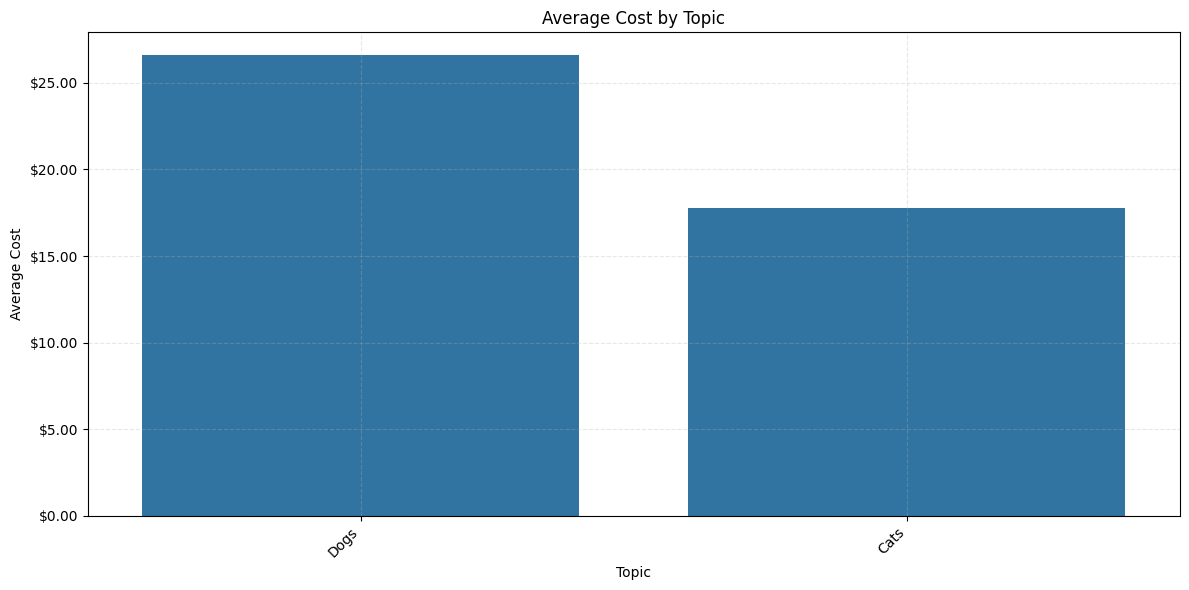

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean cost by topic
topic_costs = df.groupby('topic')['price'].mean().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_costs.index, y=topic_costs.values)

# Add labels and title
plt.title('Average Cost by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Cost')

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.2f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

### Question 4
Which topic of book has the most pages, on average? 

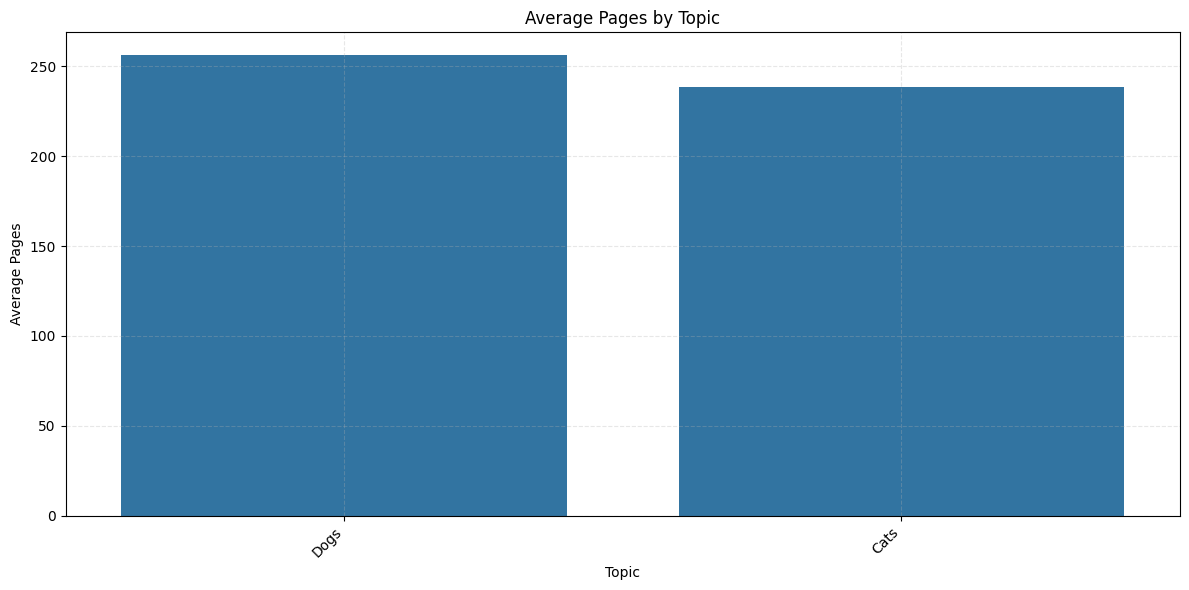

In [ ]:
# Calculate mean cost by topic
topic_pages = df.groupby('topic')['pages'].mean().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_pages.index, y=topic_pages.values)

# Add labels and title
plt.title('Average Pages by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Pages')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()